# CDF and Quantile PDF Plot of Standard Normal Distribution

In [1]:
import os

try:
    import jax
except:
    %pip install jax jaxlib
    import jax

import jax.numpy as jnp
from jax.scipy.stats import norm

try:
    import matplotlib.pyplot as plt
except:
    %pip install matplotlib
    import matplotlib.pyplot as plt

try:
    import seaborn as sns
except:
    %pip install seaborn
    import seaborn as sns

In [2]:
dev_mode = "DEV_MODE" in os.environ

if dev_mode:
    import sys

    sys.path.append("scripts")
    import pyprobml_utils as pml
    from latexify import latexify

    latexify(width_scale_factor=2, fig_height=1.5)

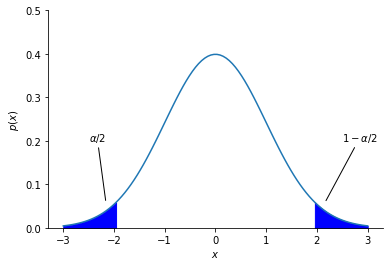

In [3]:
x = jnp.linspace(-3, 3, 100)

plt.plot(x, norm.pdf(x))
x_sep_left = norm.ppf(0.025)
x_sep_right = norm.ppf(0.975)
x_fill_left = jnp.linspace(-3, x_sep_left, 100)
x_fill_right = jnp.linspace(x_sep_right, 3, 100)
plt.fill_between(x_fill_left, norm.pdf(x_fill_left), color="b")
plt.fill_between(x_fill_right, norm.pdf(x_fill_right), color="b")
plt.annotate(
    r"$\alpha/2$",
    xy=(x_sep_left-0.2, norm.pdf(x_sep_left)),
    xytext=(-2.5, 0.2),
    arrowprops=dict(facecolor="k", arrowstyle = '-'),
)

plt.annotate(
    r"$1-\alpha/2$",
    xy=(x_sep_right+0.2, norm.pdf(x_sep_right)),
    xytext=(2.5, 0.2),
    arrowprops=dict(facecolor="k", arrowstyle = '-'),
)

plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.ylim([0, 0.5])
sns.despine()
if dev_mode:
    pml.savefig("gaussianQuantile_latexified.pdf")

# plt.show()